# Final Project: Most Streamed Songs on Spotify 2023 ~ An Analysis 

In [2]:
#Here, I'm downloading all necessary libraries needed to preprocess and analyze a dataset of the most streamed songs on Spotify 2023 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler  

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV  # this is a new method
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence

In [3]:
#Read CSV File

music_df = pd.read_csv('spotify-2023.csv', encoding = 'latin1', sep=',')
music_df = music_df.dropna(subset=['key']) 
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            858 non-null    object
 1   artist(s)_name        858 non-null    object
 2   artist_count          858 non-null    int64 
 3   released_year         858 non-null    int64 
 4   released_month        858 non-null    int64 
 5   released_day          858 non-null    int64 
 6   in_spotify_playlists  858 non-null    int64 
 7   in_spotify_charts     858 non-null    int64 
 8   streams               858 non-null    object
 9   in_apple_playlists    858 non-null    int64 
 10  in_apple_charts       858 non-null    int64 
 11  in_deezer_playlists   858 non-null    object
 12  in_deezer_charts      858 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   858 non-null    int64 
 15  key                   858 non-null    object


In [4]:
music_df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [5]:
#Identify unique values --> code copied from Assignment 4
for column in music_df.columns:
    unique_values = music_df[column].unique()
    print(f"\nUnique values in '{column}':\n{unique_values}")


#Encode non-numeric values 

music_df_dummy = pd.get_dummies(music_df)

key_values = {'C': 0, 'C#': 1, "D": 2, "D#": 3, "E": 4, "F": 5, "F#": 6, "G": 7, "G#": 8, "A": 9, "A#": 10, "B": 11}
mode_values = {'Major': 0, 'Minor': 1}

key_encoder = music_df['key'].map(key_values)
mode_encoder = music_df['mode'].map(mode_values)

music_df['Key_Type'] = key_encoder 
music_df['Mode_Type'] = mode_encoder 

display(music_df)



Unique values in 'track_name':
['Seven (feat. Latto) (Explicit Ver.)' 'LALA' 'vampire' 'Cruel Summer'
 'WHERE SHE GOES' 'Sprinter' 'Ella Baila Sola' 'Columbia' 'fukumean'
 'La Bebe - Remix' 'un x100to' 'Super Shy' 'Daylight' 'As It Was'
 'Kill Bill' 'Cupid - Twin Ver.' 'Classy 101' 'Like Crazy' 'LADY GAGA'
 'I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The '
 'Peso Pluma: Bzrp Music Sessions, Vol. 55'
 'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)'
 'SABOR FRESA' 'Calm Down (with Selena Gomez)' 'MOJABI GHOST' 'Last Night'
 'Dance The Night (From Barbie The Album)' 'Rush' 'TULUM' "Creepin'"
 'Anti-Hero' 'TQG' 'Frï¿½ï¿½gil (feat. Grupo Front' 'Blank Space' 'Style'
 'TQM' 'El Azul' 'Sunflower - Spider-Man: Into the Spider-Verse'
 "I'm Good (Blue)" 'See You Again' 'Angels Like You' 'Die For You'
 'Starboy' 'Die For You - Remix' 'El Cielo' "Baby Don't Hurt Me"
 'AMARGURA' '(It Goes Like) Nanana - Edit' 'Another Love'
 'Blinding Lights' 'Mo

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...   mode  \
0                  147  141381703                  43  ...  Major   
1                   48  133716286                  48  ...  Major   
2                  113  140003974                  94  ...  Major   
3                  100  800840817                 116  ...  Major   
4                   50  303236322                  84  ...  Minor   
..                 ...        ...                 ...  ...    ...   
948                  0   91473363                  61  ...  Major   
949                  0  121871870                   4  ...  Major   
950                  0   73513683                   2  ...  Major   
951                  0  133895612                  29  ...  Major   
952                  2   96007391                  27  ...  Minor   

    danceability_%  valence_% energy_%  acousticness_% instrumentalness_%  \
0               80         89       83              31                  0   
1               71         61       74               7                  0   
2               51         32       53              17                  0   
3               55         58       72              11                  0   
4               65         23       80              14                 63   
..             ...        ...      ...             ...                ...   
948             60         24       39              57                  0   
949             42          7       24              83                  1   
950             80         81       67               4                  0   
951             82         67       77               8                  0   
952             61         32       67              15                  0   

    liveness_%  speechiness_%  Key_Type  Mode_Type  
0            8              4        11          0  
1           10              4         1          0  
2           31              6         5          0  
3           11             15         9          0  
4           11              6         9          1  
..         ...            ...       ...        ...  
948          8              3         9          0  
949         12            

In [6]:
#Make sure numeric values are integers. Convert values in streams from object to integers. 
#NOTE: Help from CHATGPT to resolve issue with string bug --> eventually resolved for streams

music_df[~music_df['streams'].str.isnumeric()]
music_df['streams'] = pd.to_numeric(music_df['streams'], errors='coerce')
music_df['streams'] = music_df['streams'].astype('Int64')

In [7]:
#Try and reorder rows based on ranking --> get number 1 on top of the dataset

music_df = music_df.sort_values('streams')
music_df.head()

#Chart of Top 50 songs: 

music_df_50 = music_df.nlargest(50, 'streams') 
music_df_50.head()


track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

     artist_count  released_year  released_month  released_day  \
55              1           2019              11            29   
179             1           2017               1             6   
86              1           2018              11             8   
620             1           2019               5            10   
41              2           2018              10             9   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
55                  43899                 69  3703895074                 672   
179                 32181                 10  3562543890                  33   
86                  17836                 53  2887241814                 440   
620                 24529                  0  2864791672                 533   
41                  24094                 78  2808096550                 372   

     ...   mode danceability_%  valence_% energy_%  acousticness_%  \
55   ...  Major             50         38       80               0   
179  ...  Minor             83         93       65              58   
86   ...  Major             50         45       41              75   
620  ...  Minor             82         54       59              69   
41   ...  Major             76         91       50              54   

    instrumentalness_% liveness_%  speechiness_%  Key_Type  Mode_Type  
55                   0          9              7         1          0  
179                  0          9              8         1          1  
86                   0         11              3         1          0  
620                  0         18             10         6          1  
41                   0          7              5         2          0  

[5 rows x 26 columns]

## Exploratory Data Analysis

There are many ways to determine the popularity of songs, and this dataset offers us three predictors that can be used to determine this: streams, in_spotify_playlists, and in_spotify_charts. 

For this analysis, I will be determining song popularity based on number of streams total, therefore, ranking it by popularity of all time, not just in 2023 specifically. However, I will also be comparing number of streams to how often it is saved in a spotify playlist and where it is ranked on Spotify charts. This comparison can be used to determine the most accurate predictors to use for our definition of popularity. 

First, it's important to note the difference between popuarlity by streaming and rank on spotify charts. Here, I'll be comparing the first 5 rows of a table organized by streams (descending) and the first 5 rows of a table organized by chart rank (ascending):

In [7]:
#NOTE: REORGANIZE WITH STREAMS COLUMN AFTER ARTIST NAMES

print('Top Spotify Songs by Streams (Top 50):')
music_df_50.head()

Top Spotify Songs by Streams (Top 50):


track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

     artist_count  released_year  released_month  released_day  \
55              1           2019              11            29   
179             1           2017               1             6   
86              1           2018              11             8   
620             1           2019               5            10   
41              2           2018              10             9   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
55                  43899                 69  3703895074                 672   
179                 32181                 10  3562543890                  33   
86                  17836                 53  2887241814                 440   
620                 24529                  0  2864791672                 533   
41                  24094                 78  2808096550                 372   

     ...   mode danceability_%  valence_% energy_%  acousticness_%  \
55   ...  Major             50         38       80               0   
179  ...  Minor             83         93       65              58   
86   ...  Major             50         45       41              75   
620  ...  Minor             82         54       59              69   
41   ...  Major             76         91       50              54   

    instrumentalness_% liveness_%  speechiness_%  Key_Type  Mode_Type  
55                   0          9              7         1          0  
179                  0          9              8         1          1  
86                   0         11              3         1          0  
620                  0         18             10         6          1  
41                   0          7              5         2          0  

[5 rows x 26 columns]

In [8]:
#NOTE: REORGANIZE WITH CHARTS COLUMN AFTER ARTIST NAMES

# I'll filter out songs that rank '0' in spotify charts: 
charts_music_df = music_df[music_df.in_spotify_charts != 0] #IMPORTANT NOTE: Help from StackOverflow for this line of code.

print('Top Spotify Songs by Rank on Charts:')
charts_music_df_50 = charts_music_df.nsmallest(50, 'in_spotify_charts') 
charts_music_df_50.head()

Top Spotify Songs by Rank on Charts:


track_name  \
228  Hummingbird (Metro Boomin & James Blake)   
254                              Mejor Que Yo   
927       I Really Want to Stay at Your House   
851                               Daydreaming   
846                              Keep Driving   

                      artist(s)_name  artist_count  released_year  \
228        James Blake, Metro Boomin             2           2023   
254  Mambo Kingz, DJ Luian, Anuel Aa             3           2023   
927      Rosa Walton, Hallie Coggins             2           2020   
851                     Harry Styles             1           2022   
846                     Harry Styles             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
228               6             2                   277                  1   
254               5             4                   675                  1   
927              12            18                   668                  1   
851               5            20                  1900                  1   
846               5            20                  2094                  1   

       streams  in_apple_playlists  ...   mode danceability_%  valence_%  \
228   39666245                   1  ...  Major             59         26   
254   50847624                   9  ...  Minor             62         56   
927  140430339                   0  ...  Minor             49         13   
851  187703102                  15  ...  Minor             71         90   
846  236060709                   8  ...  Major             72         90   

    energy_%  acousticness_% instrumentalness_% liveness_%  speechiness_%  \
228       60              46                  1         25             13   
254       66              18                  0         12              5   
927       74               0                  0          9              4   
851       81              31                  2         13              3   
846       48              32                  0         18             23   

     Key_Type  Mode_Type  
228         6          0  
254         1          1  
927         3          1  
851         4          1  
846         9          0  

[5 rows x 26 columns]

Neither of the Top 5 songs for either table match. Let's add in an additional predictor, 'in_spotify_playlists' and use sns.pairplot to identify correlation strength between each of these predictors. 

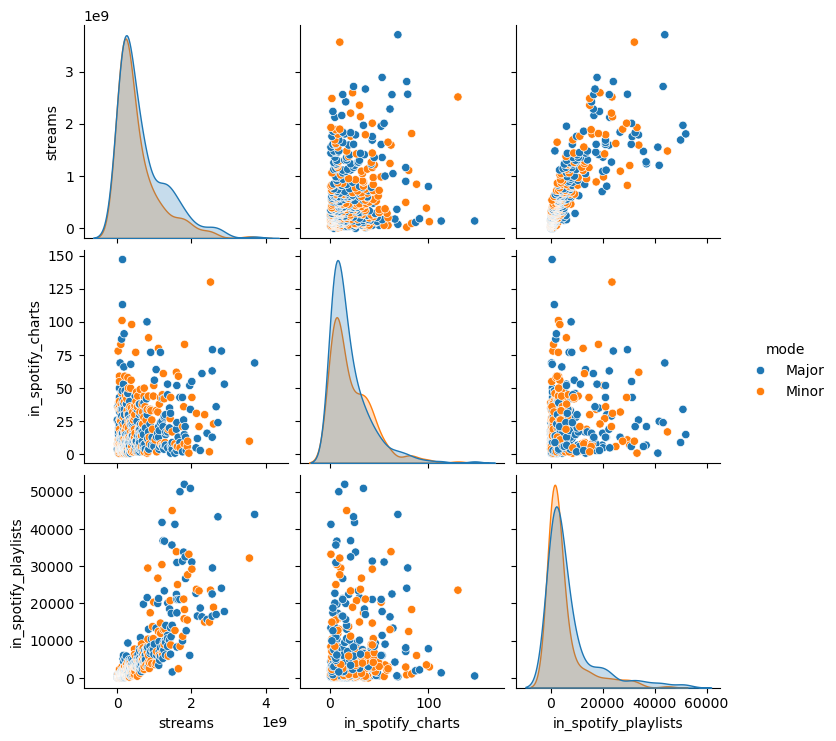

In [9]:
#I'll add an additional predictor, 'mode', to determine whether a song featured in this plot is major or minor (one of two categorical variables that will be evaluated. 

pop_vars = ['streams', 'in_spotify_charts', 'in_spotify_playlists']
sns.pairplot(charts_music_df, vars = pop_vars, hue = 'mode')


After removing rows with a '0' ranking, the correlation between the prescence/rank of a song and streams still remains weak. The same could be said for the relationship between prescence/rank and playlist saves. However, there is a strong correlation between streams and playlist saves. Therefore we will proceed with number of streams being our primary indicator of popularity for this analysis. 

It is important to notw that the relationship between streams and playlist saves is the stregnth of correlation gradually decreasing after 200,000,000 streams and about 25,000 playlist saves. We can use a polynomial  regression model for better fitting once we start training this dataset. 

Key and Mode are the only categorical variables to concern ourselves with for this analysis. We'll use sns.countplot to determine the number of Top 50 songs in each mode and each key categorized by mode. 

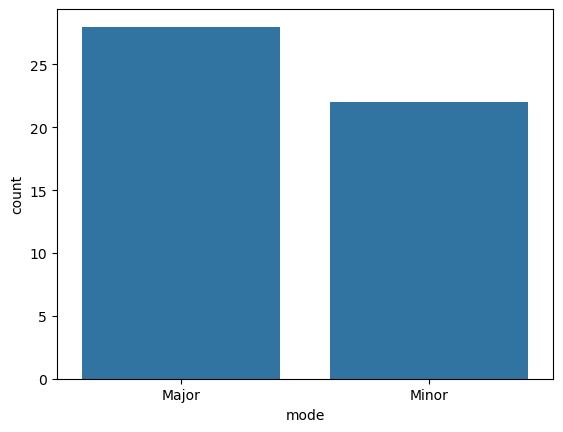

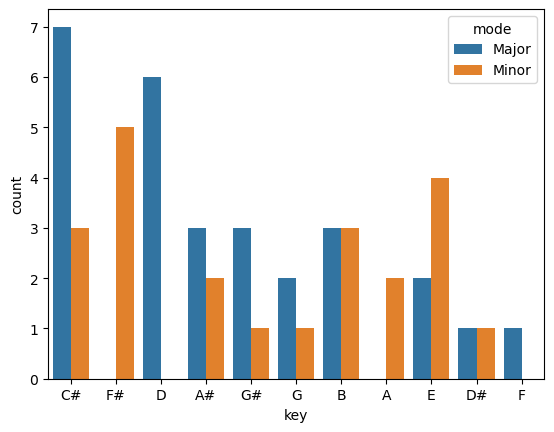

In [10]:
"""Create a countplot of songs in each key and mode""" 

sns.countplot(music_df_50, x = 'mode')
plt.show()

sns.countplot(music_df_50, x = 'key', hue = 'mode')
plt.show()



Let's observe the distributions of the numeric variables in the entirety of the dataset using sns.histogram()

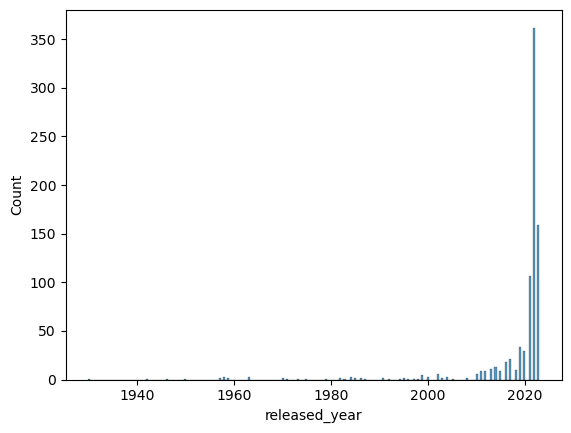

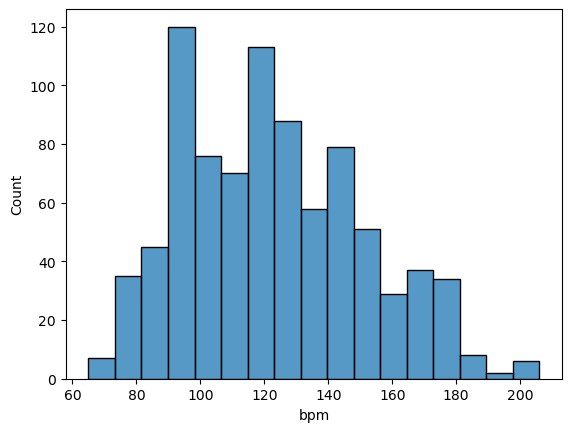

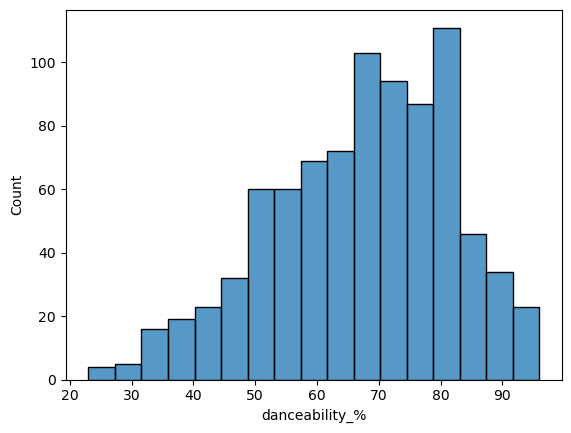

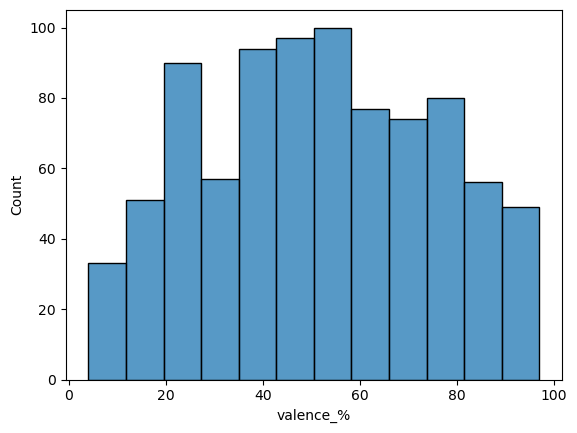

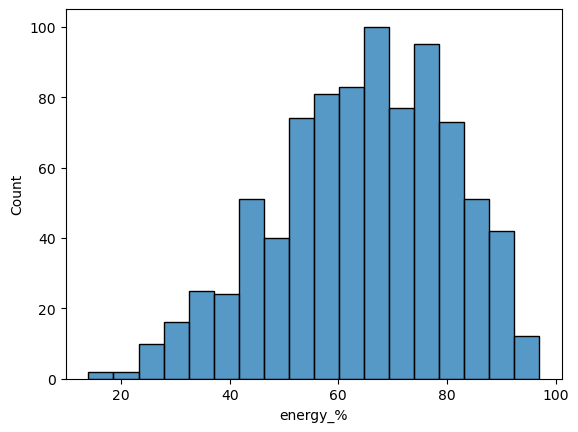

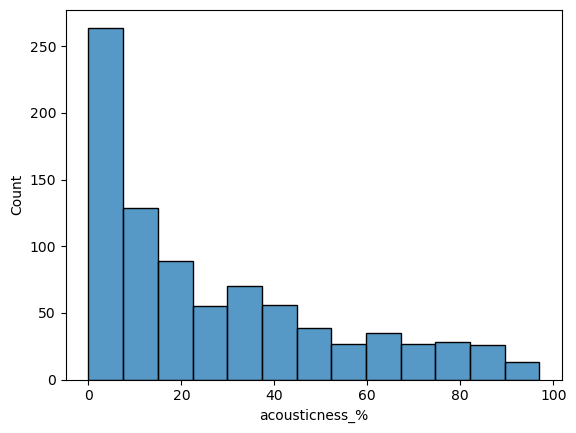

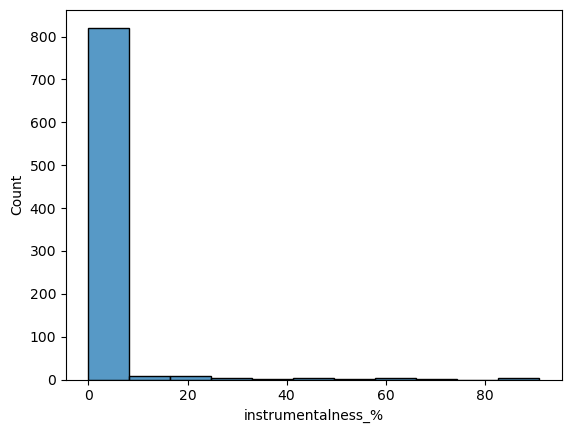

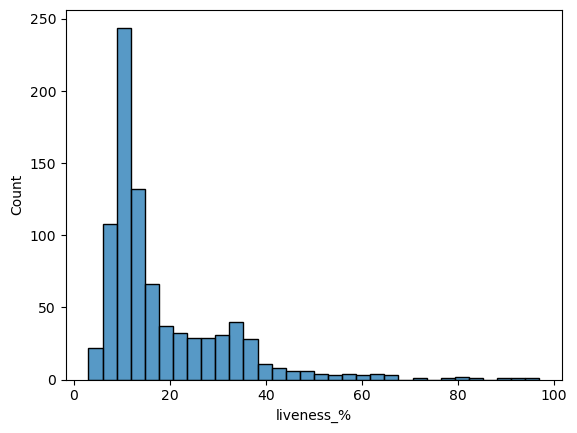

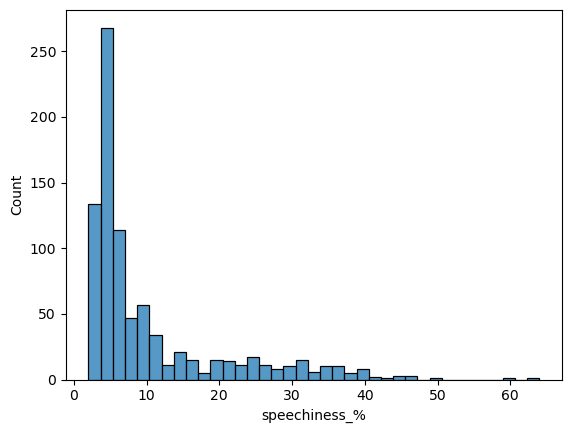

In [11]:
#Map predictors from main dataset onto histogram

sns.histplot(data = music_df, x = 'released_year')
plt.show()
sns.histplot(data = music_df, x = 'bpm')
plt.show()
sns.histplot(data = music_df, x = 'danceability_%')
plt.show()
sns.histplot(data = music_df, x = 'valence_%')
plt.show()
sns.histplot(data = music_df, x = 'energy_%')
plt.show()
sns.histplot(data = music_df, x = 'acousticness_%')
plt.show()
sns.histplot(data = music_df, x = 'instrumentalness_%')
plt.show()
sns.histplot(data = music_df, x = 'liveness_%')
plt.show()
sns.histplot(data = music_df, x = 'speechiness_%')
plt.show()

Now let's look at the distribution based on our sorted list of Top 50 songs

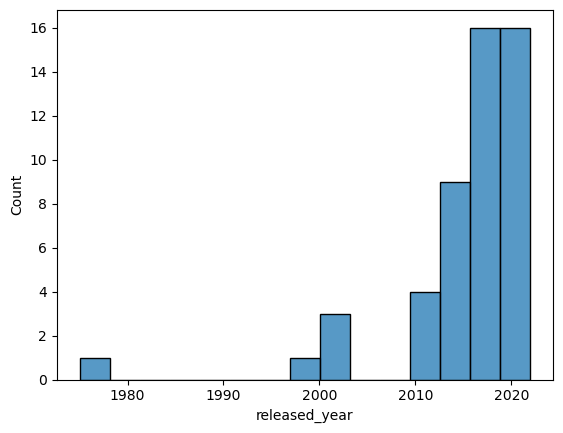

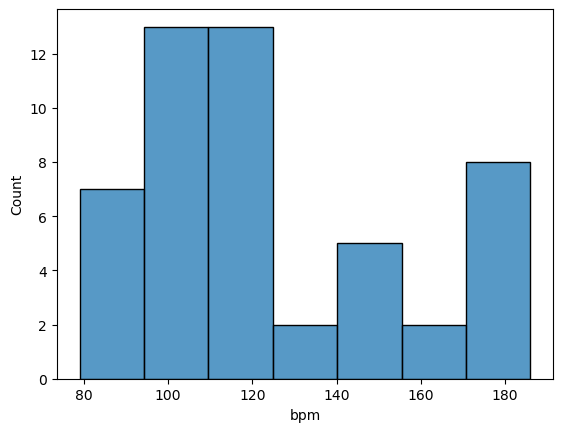

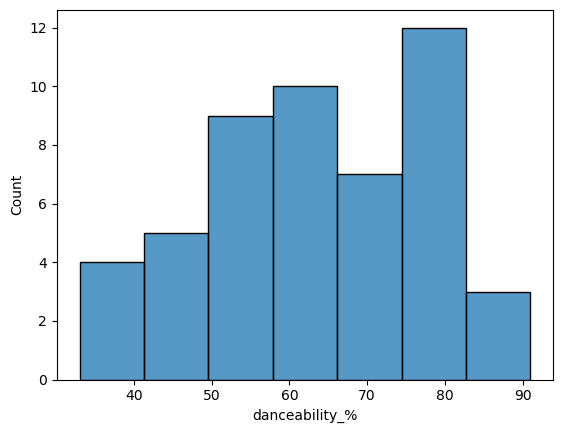

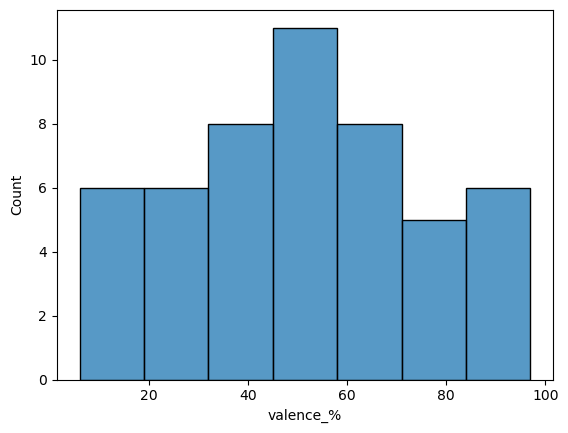

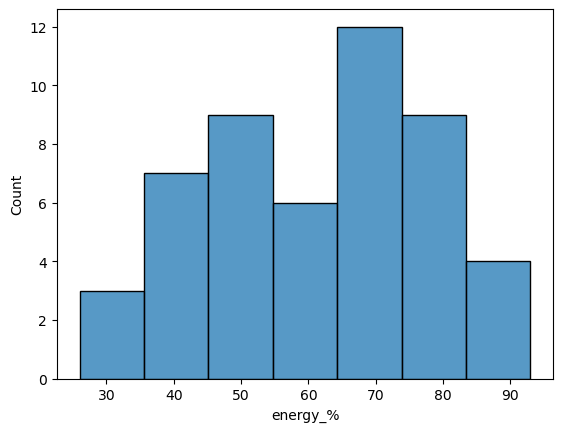

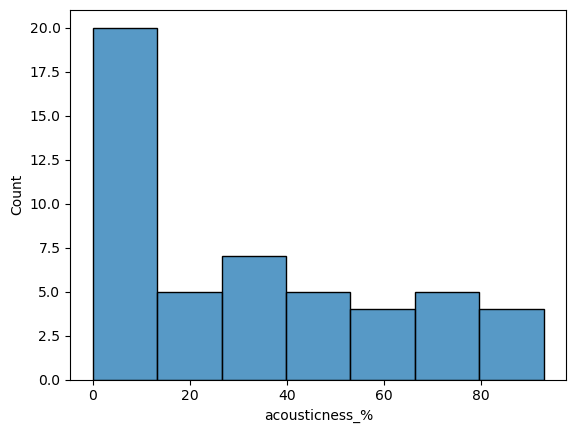

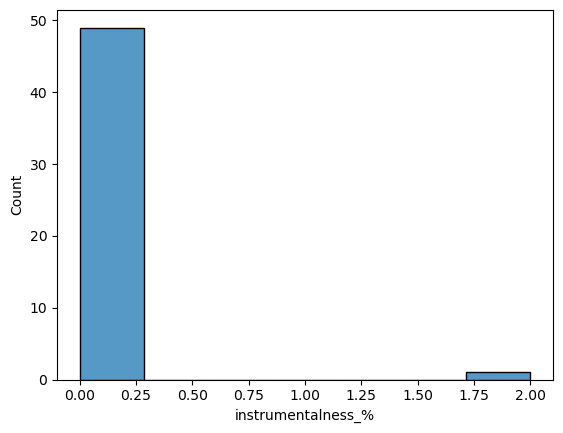

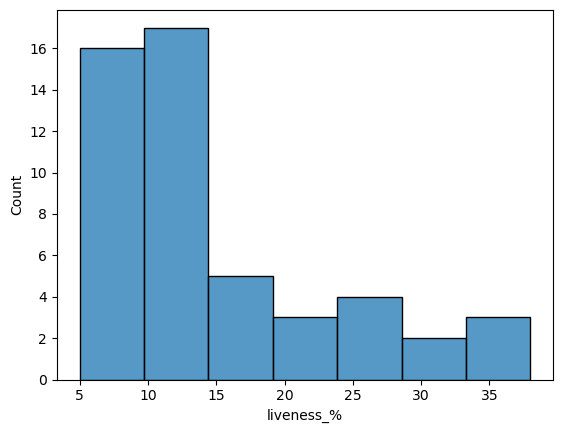

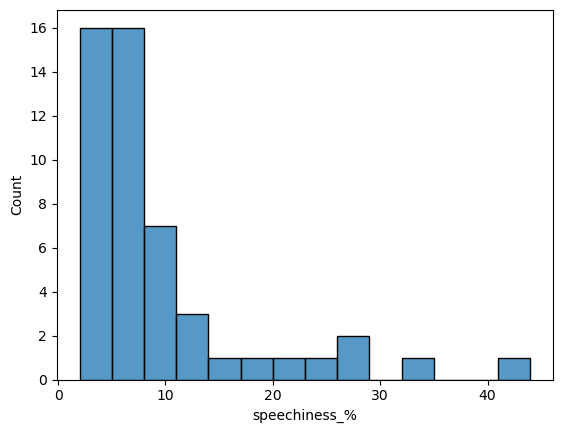

In [13]:
#Map predictors from Top 50 dataset to histogram

sns.histplot(data = music_df_50, x = 'released_year')
plt.show()
sns.histplot(data = music_df_50, x = 'bpm')
plt.show()
sns.histplot(data = music_df_50, x = 'danceability_%')
plt.show()
sns.histplot(data = music_df_50, x = 'valence_%')
plt.show()
sns.histplot(data = music_df_50, x = 'energy_%')
plt.show()
sns.histplot(data = music_df_50, x = 'acousticness_%')
plt.show()
sns.histplot(data = music_df_50, x = 'instrumentalness_%')
plt.show()
sns.histplot(data = music_df_50, x = 'liveness_%')
plt.show()
sns.histplot(data = music_df_50, x = 'speechiness_%')
plt.show()

#NOTE: Find a way to measure and identify differences in distribution between 

Using sns.pairplot, let's observer the relationship between our numeric values and look for correlations we can use for future models

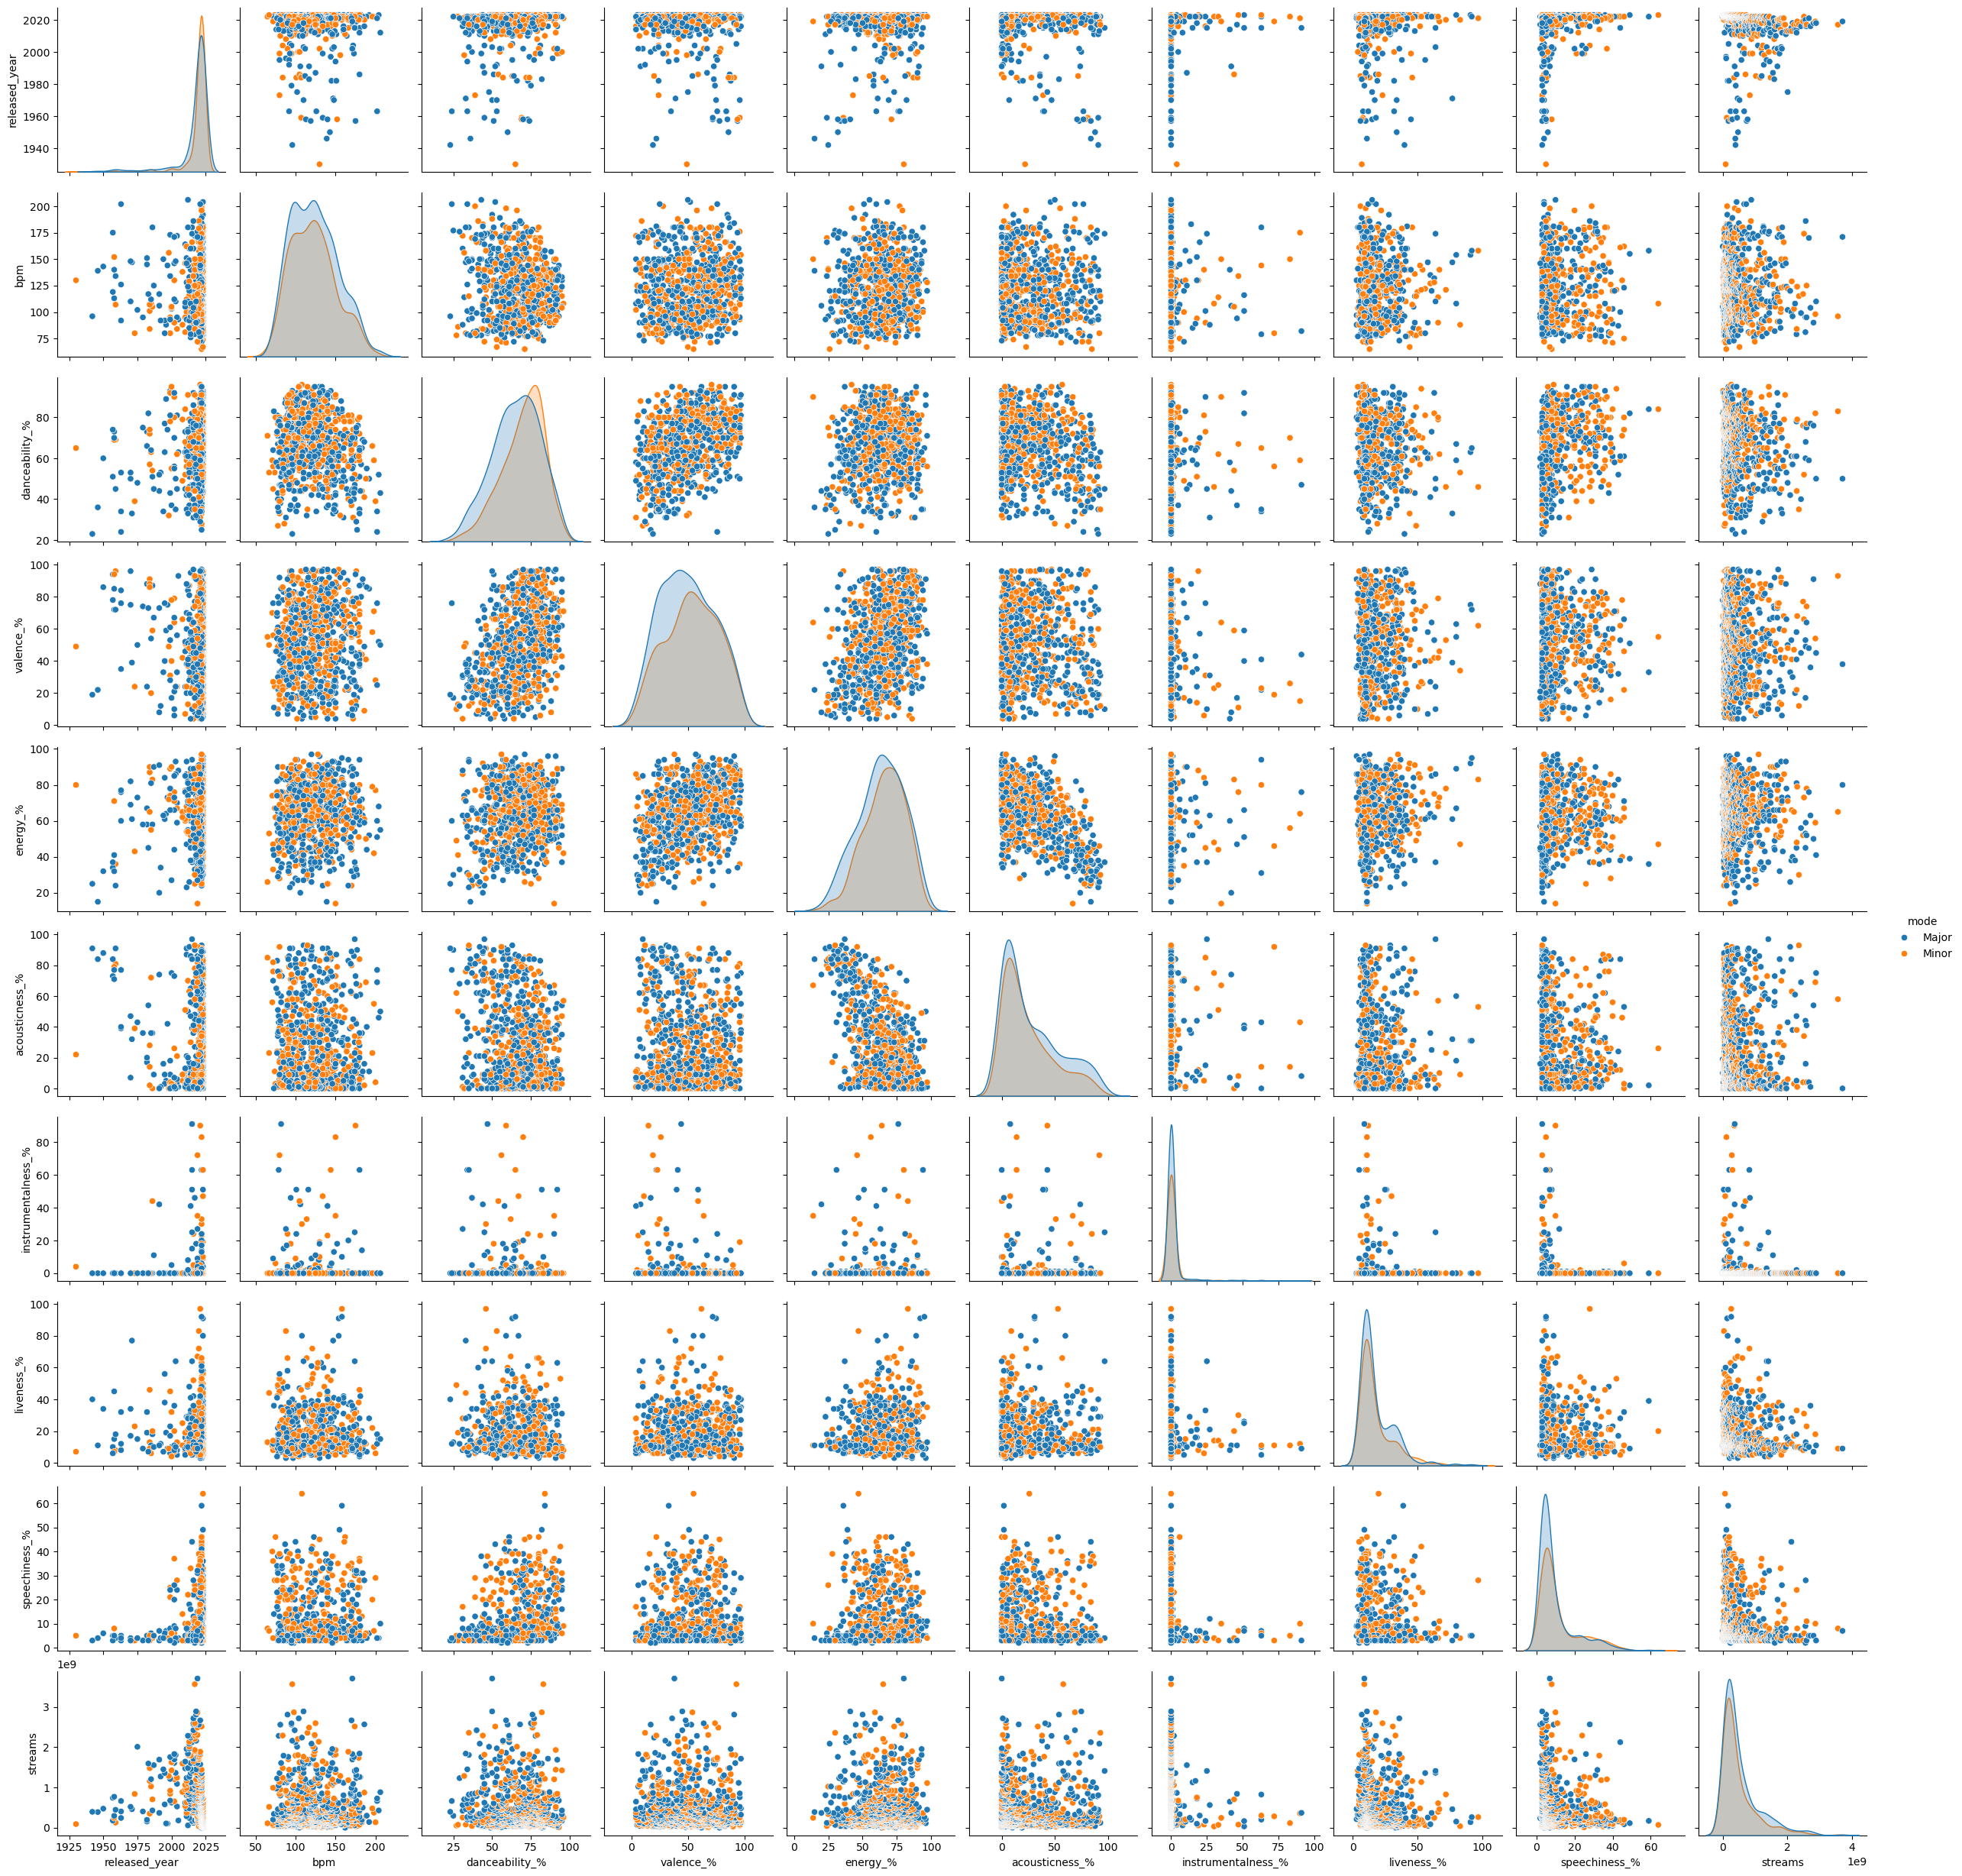

In [12]:
music_observe_var = ['released_year', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']

sns.pairplot(music_df, vars = music_observe_var, hue = 'mode')


Lastly, let's create a heat map comparing the relationship between these numeric variables 

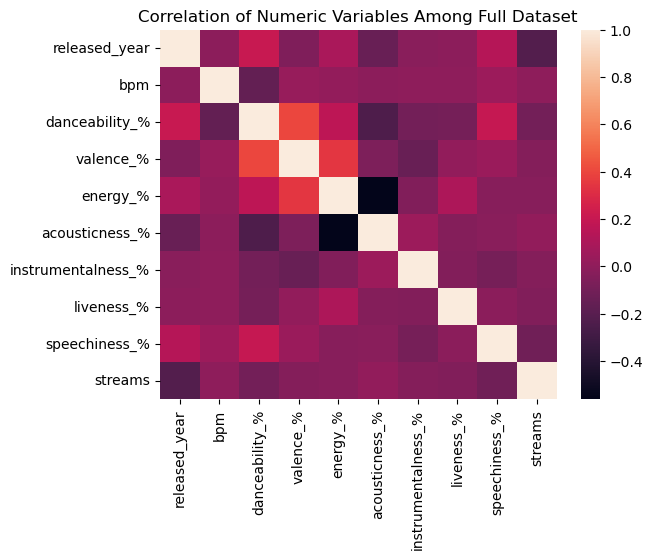

In [13]:
sns.heatmap(music_df[music_observe_var].corr())
plt.title('Correlation of Numeric Variables Among Full Dataset')
plt.show()



The heatmap above represents the correlation strength of variables among the full dataset. Some variables are slightly more correlated than others, but a majority of these relationships are weak. However, we can still look into how some of these predictors influence the number of streams.

## Modeling and Analysis

QUESTION 1: How does each predictor (or a combination of predictors) impact number of streams?

In [14]:
#IMPORTANT NOTE: Help from CHATGPT for setting up data for clustering
music_var = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

scaler = StandardScaler() 
x_scaled = scaler.fit_transform(music_df[music_var])

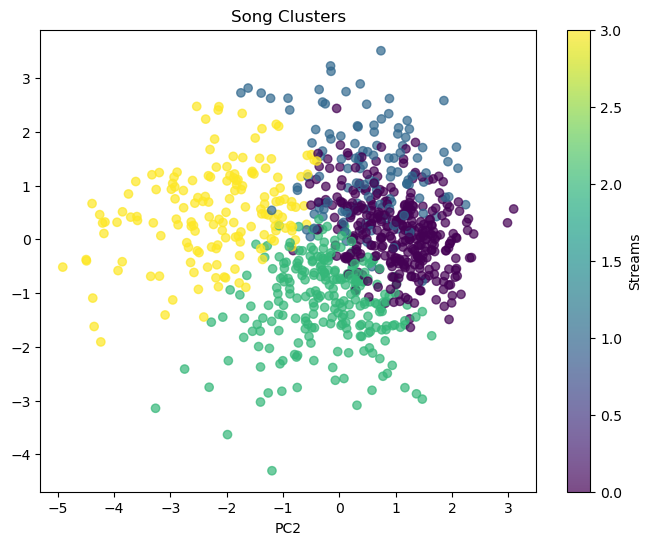

PC1       PC2
bpm                -0.042304 -0.206867
danceability_%      0.456001  0.447314
valence_%           0.457019  0.228409
energy_%            0.545063 -0.396105
acousticness_%     -0.483294  0.383918
instrumentalness_% -0.182064 -0.247688
liveness_%          0.048378 -0.359314
speechiness_%       0.123500  0.458473

In [15]:
#IMPORTANT NOTE: Help from CHATGPT to generate code for using kmeans cluster and mapping results onto a scatter plot 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  

kmeans = KMeans(n_clusters=4, random_state=42)
music_df['cluster'] = kmeans.fit_predict(x_scaled)
cluster_summary = (music_df.groupby('cluster')[music_var].mean())

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

music_df['PC1'] = x_pca[:, 0]
music_df['PC2'] = x_pca[:, 1]

plt.figure(figsize = (8,6))
plt.scatter(music_df['PC1'], music_df['PC2'], c=music_df['cluster'], alpha = 0.7)

plt.colorbar(label='Streams')
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Song Clusters')
plt.show()

#IMPORTANT NOTE: Help from ChatGPT to generate line of code that lists what predictors contribute the most to PC1 and PC2

pd.DataFrame(pca.components_.T, index=music_var, columns = ['PC1', 'PC2'])

PC1, representing the highest variance among predictors, is most significantly impacted by high danceability, high valence, and high energy while contrasting with predictors like low bpm, low acousticness, and low instrumentalness. PC2, the category with the next greatest varience that is orthogonal to PC2, is defined by moderate acousticness, high speechiness, and also high danceability, with predictors like low bpm, low energy, low instrumentalness, and low liveliness contrasting against PC2 predictors. 

Above is a scatter plot of all clusters after performing k-Means clustering our data. Once applying our hue, 'streams', the graph shows a relationship between number of streams and the combination of predictors that are associated with these streams. 

As expected, these clusters are overlapping, so we can infer these predictors are not entirely dependent on each other, however, we can make out clusters like yellow that are strongly aggregated towards a higher PC2 and PC1, indicating that predictors categorized into either PC1 and PC2 are most strongly associated with more streams. 

Therefore, high danceability, valence, energy, and speechiness are predictors to consider when identifying what makes a song popular. 

NOTE: PCA ANSWERS COMBINATION OF VARIABLES THAT EXPLAINS VARIANCE IN EACH DATAPOINT, NOT RELATIONSHIP TO STREAMS --> HOWEVER, CERTAIN COMBINATION OF VARIABLES ARE LINKED TO HIGHER STREAMS

Let's begin by splitting our data into testing and training data sets: 

Now that we know what predictors are related to higher number of streams, we can use Random Forest to make predictions about what specific predictors are impacting streams and compare them to our cluster. 

In [16]:
music_df = music_df.dropna(subset=['streams']) #IMPORTANT NOTE: Credit to CHATGPT line of code to help fix NaN bug

#new_features = ['danceability_%', 'valence_%', 'energy_%','speechiness_%']
x = music_df[music_var] #IMPORTANT NOTE: Help from ChatGPT to fix mistake with assigning x and y. 
y = music_df['streams']

#IMPORTANT NOTE: Help from site GeeksForGeeks to help understand the concept of Random Forest Regressors 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

rf_music = RandomForestRegressor(n_estimators = 500, random_state = 42)

rf_music.fit(x_train, y_train)

y_pred = rf_music.predict(x_test)

single_data = x_test.iloc[0].values.reshape(1, -1)
predicted_value = rf_music.predict(single_data)
print(f'Predicted Value: {predicted_value[0]:.2f}')
print(f'Actual Value: {y_test.iloc[0]:.2f}')
print('Accuracy Score: ', rf_music.score(x_test, y_test))


Predicted Value: 853002943.06
Actual Value: 933815613.00
Accuracy Score:  -0.03819794112185826


c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


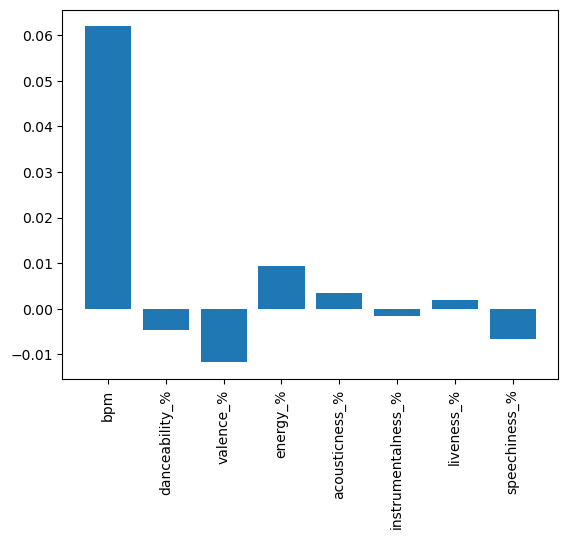

In [17]:
#Calculating Permutation Importance

result = permutation_importance(rf_music, x_test, y_test, n_repeats = 100)
plt.bar(music_var, result['importances_mean'])
plt.xticks(music_var, rotation=90)
plt.show() 

While a combination of predictors like valence, energy, danceability, and speechiness are associated with higher streams, these predictors, along with others, do not predict number of streams alone. However, bpm appears to be the best predictor for determining the number of streams a song could get. 

QUESTION 2: Based on the predictors we analyzed, can we predict what individual or combination of predictors can influence whether a song is Major or Minor? 

In [26]:
#new_features = ['danceability_%', 'valence_%', 'energy_%','speechiness_%']
x = music_df[music_var] #IMPORTANT NOTE: Help from ChatGPT to fix mistake with assigning x and y. 
y = music_df['Mode_Type']
class_names = ['Major', 'Minor']

#IMPORTANT NOTE: Help from site GeeksForGeeks to help understand the concept of Random Forest Regressors 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

rf_music = RandomForestClassifier(n_estimators = 500, random_state = 42)

rf_music.fit(x_train, y_train)

y_pred = rf_music.predict(x_test)

single_data = x_test.iloc[0].values.reshape(1, -1)
predicted_value = rf_music.predict(single_data)
print(f'Predicted Value: {predicted_value[0]:.2f}')
print(f'Actual Value: {y_test.iloc[0]:.2f}')
print('Accuracy Score: ', rf_music.score(x_test, y_test))

Predicted Value: 1.00
Actual Value: 1.00
Accuracy Score:  0.5348837209302325


c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[67 40]
 [40 25]]


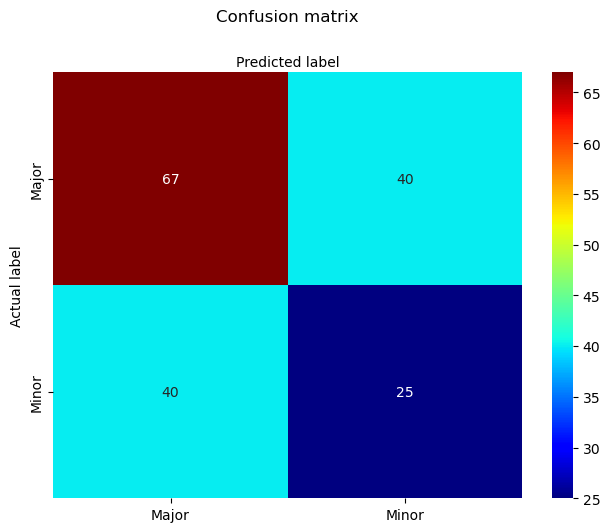

In [27]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()

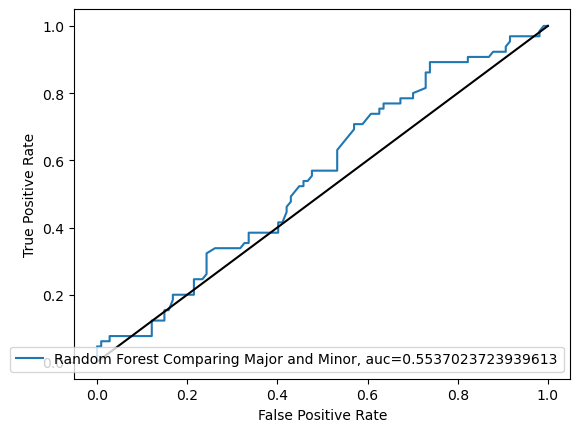

In [30]:
#Note: Code copied from Week 6 Lecture Bagging Random Forests
y_pprob = rf_music.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test,  y_pprob[:,1])
auc = roc_auc_score(y_test, y_pprob[:,1])
plt.plot(fpr,tpr,label="Random Forest Comparing Major and Minor, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k-')
plt.legend(loc=4)
plt.show()

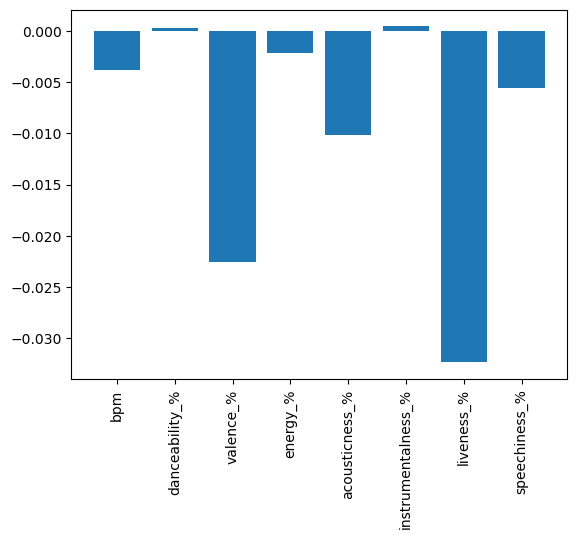

In [29]:
result = permutation_importance(rf_music, x_test, y_test, n_repeats = 100)
plt.bar(music_var, result['importances_mean'])
plt.xticks(music_var, rotation=90)
plt.show() 

Based on the performance of this Random Forest Classifier, we can conclude that the predictors we've previously analyzed do not help with predicting whether a song could be major or minor. While there are very, very miniscule predictors, such as danceability and instrumentalness, that do have a small degree of predictability, we can ultimately conclude that we cannot identify what individual variables are the most influential in determining the likely mode of a song. 